In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy import misc

# Convolutions

The convolution operation applies the same filter at all locations in an image.

more info:
* http://deeplearning.net/tutorial/lenet.html
* https://en.wikipedia.org/wiki/Convolution 
* https://en.wikipedia.org/wiki/Kernel_%28image_processing%29

In [5]:
images_directory = '../data/imdb_crop/01/'
mat_file = '../data/imdb_crop/imdb.mat'

In [6]:
import glob
from collections import defaultdict

image_list = []
filenames = []
sizes = defaultdict(int)

for filename in glob.glob(images_directory+'*.jpg'):
    im = misc.imread(filename)
    sizes[im.shape[0]] += 1
    image_list.append(im)
    filenames.append(filename)

In [7]:
sizes_arr = np.vstack([np.array(list(sizes.keys())),
                       np.array(list(sizes.values()))])

In [8]:
n = len(image_list)
n

5547

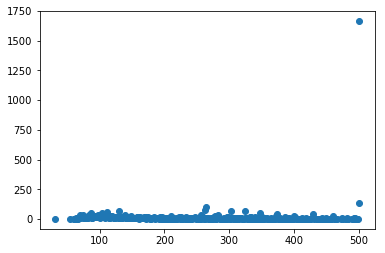

In [9]:
scatter(sizes_arr[0,:], sizes_arr[1,:])

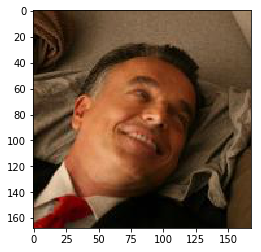

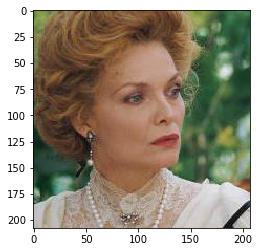

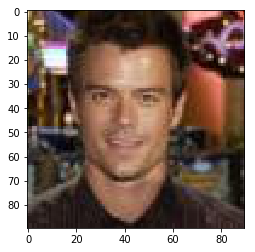

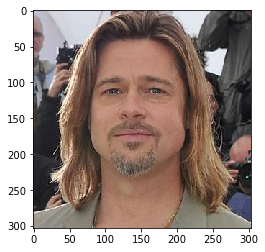

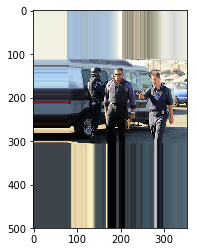

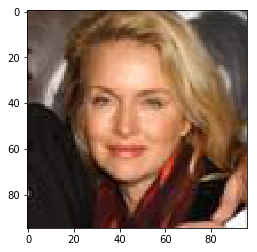

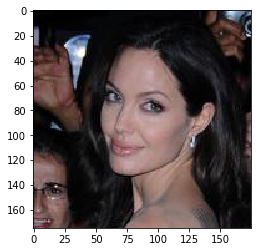

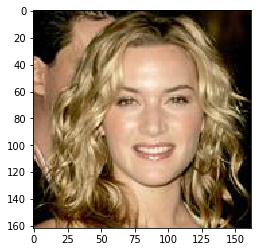

In [10]:
sample = np.random.randint(0, n, 9)

for i in range(1,9):
    #subplot(190+i)
    imshow(image_list[sample[i]])
    show()

In [11]:
import scipy.io
mat = scipy.io.loadmat(mat_file)

In [12]:
list(mat.keys())

['__header__', '__version__', 'imdb', '__globals__']

In [13]:
data_mat = mat['imdb'][0,0]

In [14]:
len(data_mat)

10

In [15]:
for i in data_mat:
    comment = 'sorted' if all(i[j] <= i[j+1] for j in range(len(i)-1)) else 'not sorted'
    print("Array of shape {0}, {1}, sample item: {2}".format(i.shape, comment, i[0,0]))

Array of shape (1, 460723), sorted, sample item: 693726
Array of shape (1, 460723), sorted, sample item: 1968
Array of shape (1, 460723), sorted, sample item: ['01/nm0000001_rm124825600_1899-5-10_1968.jpg']
Array of shape (1, 460723), sorted, sample item: 1.0
Array of shape (1, 460723), sorted, sample item: ['Fred Astaire']
Array of shape (1, 460723), sorted, sample item: [[ 1072.926   161.838  1214.784   303.696]]
Array of shape (1, 460723), sorted, sample item: 1.4596929136202572
Array of shape (1, 460723), sorted, sample item: 1.1189733571573068
Array of shape (1, 20284), sorted, sample item: ["'Lee' George Quinones"]
Array of shape (1, 460723), sorted, sample item: 6488


In [22]:
filenames_all = data_mat[2]
filenames_all.shape

(1, 460723)

In [23]:
def stats(id):
    for i in data_mat:
        if i.shape == (1, 460723):
            print(i[0,id])

In [24]:
index = dict()
for (i,n) in enumerate(filenames_all[0,:]):
    assert(n.shape == (1,))
    index[n[0]] = i

In [25]:
i = index['01/nm0005501_rm1615724032_1960-4-4_2014.jpg']
i

176092

In [26]:
stats(i)

715970
2014
['01/nm0005501_rm1615724032_1960-4-4_2014.jpg']
0.0
['Lorraine Toussaint']
[[ 647.52224218  284.44298096  827.0138728   463.93461157]]
4.01776760289
3.48196120219
12099


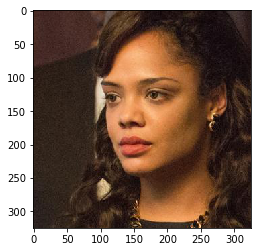

In [27]:
imshow(image_list[0])